In [131]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [132]:
tf.test.is_gpu_available()

False

In [133]:
batchsize=8

In [134]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory('/Users/air/Desktop/Prepared Data/train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory('/Users/air/Desktop/Prepared Data/train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 63970 images belonging to 2 classes.
Found 15991 images belonging to 2 classes.


In [135]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('/Users/air/Desktop/Prepared Data/test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 4937 images belonging to 2 classes.


In [136]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [137]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 80, 80, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 39, 39,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 39, 39,    │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 39, 39,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 37, 37,    │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 37, 37,    │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 18, 18,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 18, 18,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 18, 18,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 18, 18,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 16, 16,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 16, 16,    │          0 │ batch_normalizat

 Total params: 21,934,050 (83.67 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [138]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [139]:
checkpoint = ModelCheckpoint('/Users/air/Desktop/Prepared Data/models/model.keras',
                             monitor='val_loss', save_best_only=True, verbose=3)

earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]


In [140]:
! pip install pillow

In [141]:
! pip install scipy

In [142]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data) // batchsize,
    validation_data=validation_data,
    validation_steps=len(validation_data) // batchsize,
    callbacks=callbacks,
    verbose=1  # Optional: Control the verbosity of output
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_634']. Received: the structure of inputs=*
  warnings.warn(


999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8702 - loss: 0.3365
Epoch 1: val_loss improved from inf to 0.20043, saving model to /Users/air/Desktop/Prepared Data/models/model.keras
999/999 ━━━━━━━━━━━━━━━━━━━━ 329s 275ms/step - accuracy: 0.8702 - loss: 0.3364 - val_accuracy: 0.9247 - val_loss: 0.2004 - learning_rate: 0.0010
Epoch 2/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9172 - loss: 0.2153
Epoch 2: val_loss improved from 0.20043 to 0.18791, saving model to /Users/air/Desktop/Prepared Data/models/model.keras
999/999 ━━━━━━━━━━━━━━━━━━━━ 225s 226ms/step - accuracy: 0.9172 - loss: 0.2153 - val_accuracy: 0.9242 - val_loss: 0.1879 - learning_rate: 0.0010
Epoch 3/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9131 - loss: 0.2161
Epoch 3: val_loss did not improve from 0.18791
999/999 ━━━━━━━━━━━━━━━━━━━━ 235s 236ms/step - accuracy: 0.9131 - loss: 0.2161 - val_accuracy: 0.9096 - val_loss: 0.2026 - learning_rate: 0.0010
Epoch 4/5
999/999 ━━━━━━━━━━━━━

# Assistant
This error indicates that there is a mismatch between the shape of the target labels (the expected output) and the shape of the model's output. Specifically, the model is producing an output with shape `(None, 2)`, while the target labels have a shape of `(None, 3)`.

This typically happens when:
1. The number of classes in your target labels does not match the number of output units in your model.
2. You may need to adjust the final layer of your model to ensure it has the correct number of output units corresponding to the number of classes.

To fix this error, you should ensure that the last layer of your model has the same number of units as the number of classes in your target labels. If your target labels have 3 classes, the last layer should have 3 units.

Would you like me to provide the corrected code?

In [144]:
# Model Evaluation

In [145]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)


7997/7997 ━━━━━━━━━━━━━━━━━━━━ 1653s 207ms/step - accuracy: 0.9333 - loss: 0.1695
0.16933254897594452
0.9326715469360352


In [146]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 466s 233ms/step - accuracy: 0.9233 - loss: 0.1779
0.1810653805732727
0.9233318567276001


In [147]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 128s 207ms/step - accuracy: 0.8629 - loss: 0.3757
0.16933254897594452
0.9326715469360352


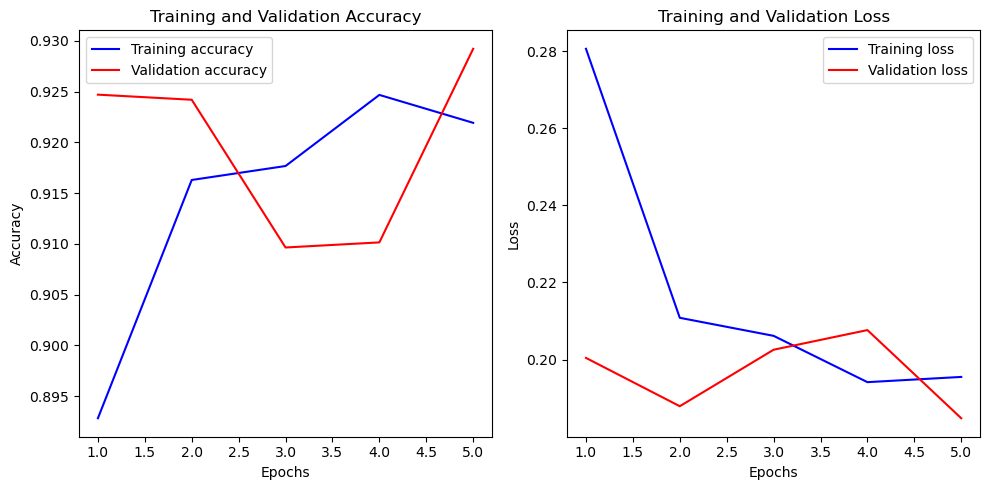

Learning rate was not logged during training.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_634']. Received: the structure of inputs=*
  warnings.warn(


618/618 ━━━━━━━━━━━━━━━━━━━━ 165s 229ms/step


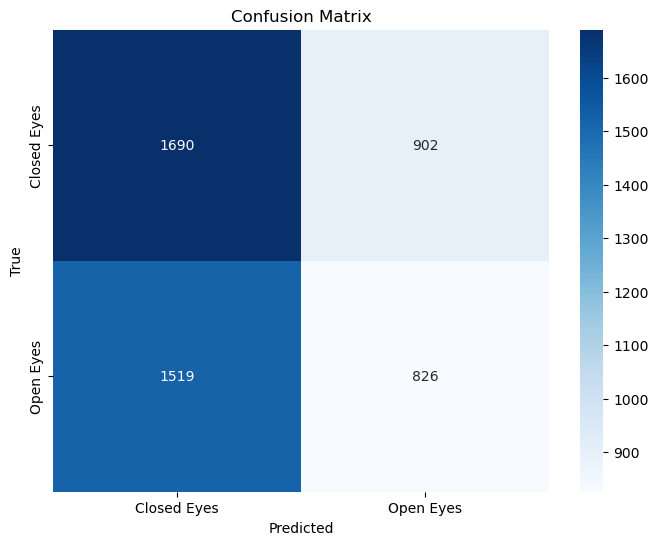

618/618 ━━━━━━━━━━━━━━━━━━━━ 133s 215ms/step


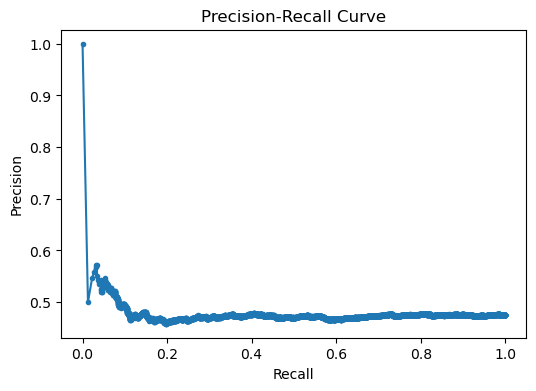

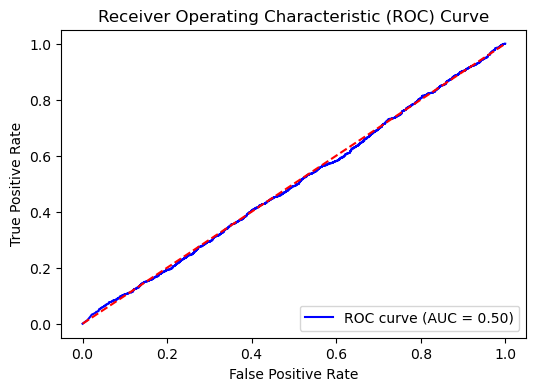

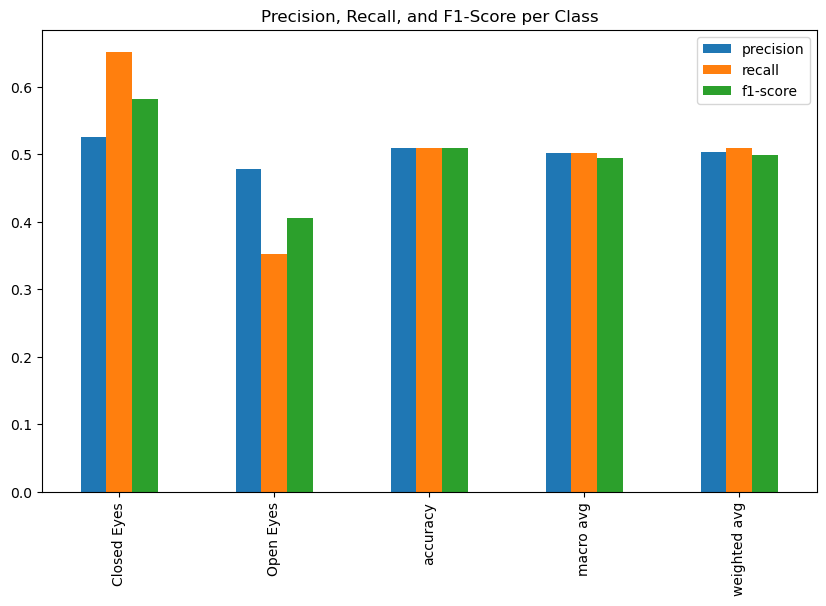

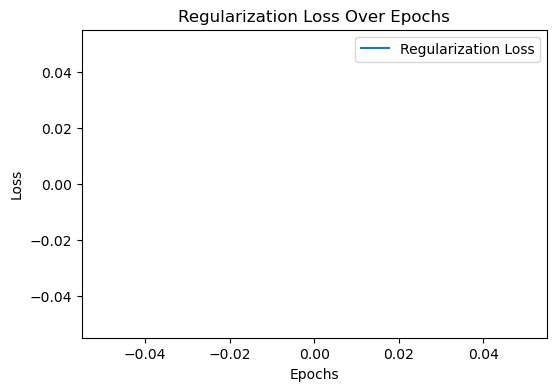

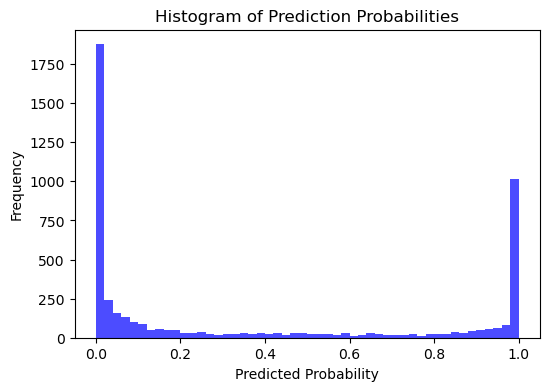

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, classification_report
import seaborn as sns
import pandas as pd

# 1. Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Learning Rate Schedule (only if logged)
if 'lr' in history.history:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()
else:
    print("Learning rate was not logged during training.")

# 3. Confusion Matrix
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Precision-Recall Curve
Y_prob = model.predict(test_data)
precision, recall, thresholds = precision_recall_curve(y_true, Y_prob[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_true, Y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 6. Precision, Recall, F1-Score per Class
report = classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys()), output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Precision, Recall, and F1-Score per Class')
plt.show()

# 7. Regularization Loss (if applicable)
regularization_losses = model.losses

plt.figure(figsize=(6, 4))
plt.plot(regularization_losses, label='Regularization Loss')
plt.title('Regularization Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Histogram of Prediction Probabilities
plt.figure(figsize=(6, 4))
plt.hist(Y_prob[:, 1], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Prediction Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


618/618 ━━━━━━━━━━━━━━━━━━━━ 149s 240ms/step


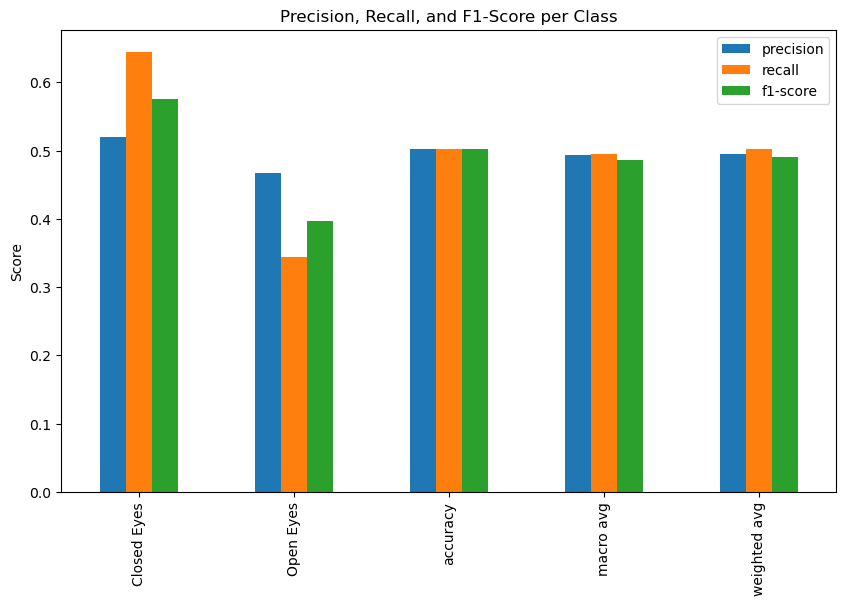

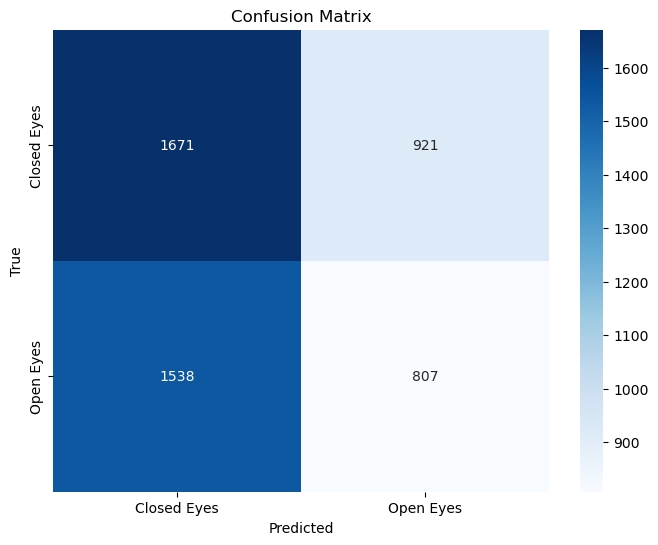

In [172]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Predictions on test data
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

# Classification report for precision, recall, F1-score
report = classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys()), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Precision, Recall, F1-score per class as bar plot
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Precision, Recall, and F1-Score per Class')
plt.ylabel('Score')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [174]:
# Gather metrics
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)

# Print the values directly
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Loss: {train_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


Training Accuracy: 0.9219219088554382
Training Loss: 0.1955059915781021
Validation Accuracy: 0.9292168617248535
Validation Loss: 0.18479008972644806
Test Accuracy: 0.8604415655136108
Test Loss: 0.3861903250217438


In [176]:
import pandas as pd

# Model metrics
data = {
    'Model': ['InceptionV3', 'ResNet50', 'Xception'],
    'Training Accuracy': [0.9219, 0.5048, 0.9128],
    'Training Loss': [0.1955, 0.6931, 0.2253],
    'Validation Accuracy': [0.9292, 0.5120, 0.9332],
    'Validation Loss': [0.1848, 0.6930, 0.1829],
    'Test Accuracy': [0.8604, 0.4750, 0.8317],
    'Test Loss': [0.3862, 0.6944, 0.3406]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Print the table
print(results_df)


         Model  Training Accuracy  Training Loss  Validation Accuracy  \
0  InceptionV3             0.9219         0.1955               0.9292   
1     ResNet50             0.5048         0.6931               0.5120   
2     Xception             0.9128         0.2253               0.9332   

   Validation Loss  Test Accuracy  Test Loss  
0           0.1848         0.8604     0.3862  
1           0.6930         0.4750     0.6944  
2           0.1829         0.8317     0.3406  
